In [1]:
# Prueba de hipótesis chi-square.

import pandas as pd
import numpy as np

from scipy import stats

from matplotlib import pyplot as plt

In [17]:
path = "../datos/"
fname = "Tabla_A2_ppt_Ithaca.dat"

var = "Precipitation"

# Se lee el archivo .dat y se ajusta su formato.
df = pd.read_table(path + fname, names = ["Year", var])
df = df.set_index("Year")

df.head()

,Precipitation
Year,
1933,0.44
1934,1.18
1935,2.69
1936,2.08
1937,3.66


In [8]:
# Ajuste de parámetros.

alpha, zeta, beta = stats.gamma.fit(
    df[var], loc = 0)
mu, sigma = stats.norm.fit( df[var] )

In [12]:
# Prueba Kolmogorov-Smirnov.

stat_n, p_n = stats.kstest( df[var],
    cdf = "norm", args = (mu, sigma) )

print("Normal")
print(f"statistic: {stat_n:.3f}")
print(f"pvalue   : {p_n:.3f}")

stat_g, p_g = stats.kstest( df[var],
    cdf = "gamma", args = (alpha, zeta, beta) )

print("Gamma")
print(f"statistic: {stat_g:.3f}")
print(f"pvalue   : {p_g:.3f}")

Normal
statistic: 0.132
pvalue   : 0.319
Gamma
statistic: 0.095
pvalue   : 0.727


(0.0, 1.0)

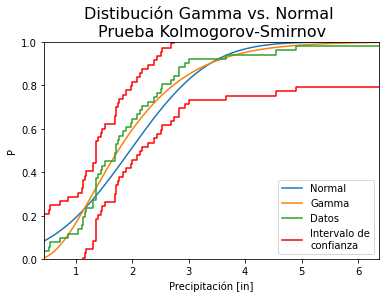

In [34]:
fig, ax = plt.subplots()

# Graficamos las distribuciones.
x = np. linspace( df[var].min(),
    df[var].max(), 1000 )

y_n = stats.norm.cdf(x, mu, sigma)
y_g = stats.gamma.cdf(x, alpha, zeta, beta)

ax.plot(x, y_n)
ax.plot(x, y_g)

# Grficamos la frecuencia acumulada.
# Criterio de Weibull.
ax.plot(df[var].sort_values(),
    range(1, len(df) + 1) / np.float64(len(df)+1),
    drawstyle="steps")

# Graficamos los intervalos de confianza.
# Distribución Kolmogorov-Smirnov
ax.plot(df[var].sort_values(),
    range(1, len(df) + 1) / np.float64(len(df)+1)
    - stats.ksone.ppf(1-0.05/2, df.shape[0]),
    drawstyle = "steps", color = "red" )
ax.plot(df[var].sort_values(),
    range(1, len(df) + 1) / np.float64(len(df)+1)
    + stats.ksone.ppf(1-0.1/2, df.shape[0]),
    drawstyle = "steps", color = "red" )


ax.set_title("Distibución Gamma vs. Normal \n"
    "Prueba Kolmogorov-Smirnov",
    fontsize = 16)
ax.set_xlabel("Precipitación [in]")
ax.set_ylabel("P")
ax.legend(["Normal", "Gamma",
    "Datos", "Intervalo de\nconfianza"])
ax.set_xlim( df[var].min(), df[var].max() )
ax.set_ylim(0, 1)